This script conducts image processing procedures, including reading image data, pre-processing image data and data-cleaning, neural network building, model validation and image visualization. 


In [140]:
#import all packages needed

import os

import pandas as pd

import numpy as np

import cv2

import matplotlib.pyplot as plt


In [141]:
#use a command to show plots in jupyter notebook
%matplotlib inline

In [142]:
#The first step is to read image data, and resize the image data into proper format

#storing the training path of plant seedling files
train_path = 'C:/jiaocai/Other/Plant Seedling Classification/train/'

#image_per_class is a dictionary storing data of images
image_per_class = {}
for class_name in os.listdir(train_path):
    class_path = train_path+str(class_name)
    class_tag = class_name
    image_per_class[class_tag] = []
    for image in os.listdir(class_path):
        image_path=class_path+'/'+str(image)
        image_col = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image_per_class[class_tag].append(image_col)


In [143]:
#print the number of images in each class in the train set
for key,value in image_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

Common Chickweed -> 611
Maize -> 221
Black-grass -> 263
Common wheat -> 221
Charlock -> 390
Sugar beet -> 385
Fat Hen -> 475
Cleavers -> 287
Shepherds Purse -> 231
Scentless Mayweed -> 516
Loose Silky-bent -> 654
Small-flowered Cranesbill -> 496


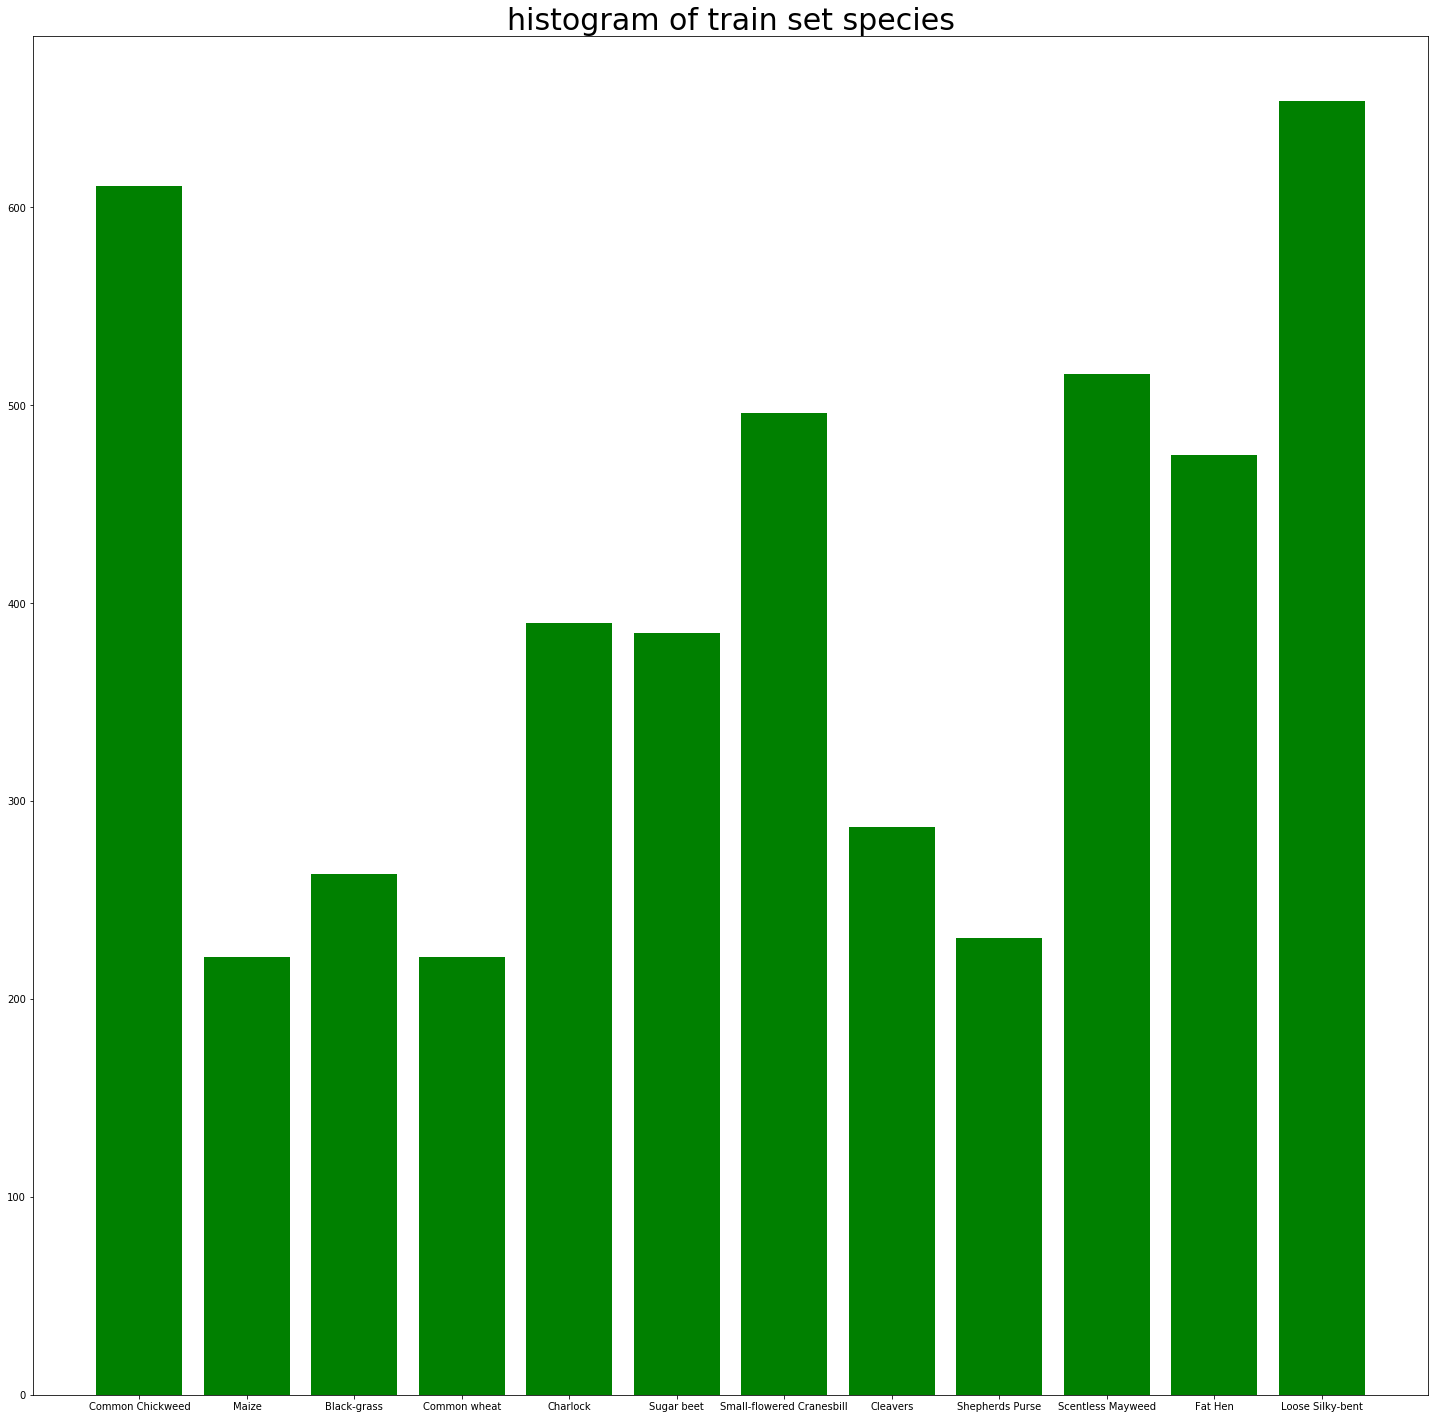

In [231]:
#draw a histogram of images per class in the given data set and 
#save the histogram to local drive
hist_dic={}
for key,value in image_per_class.items():
    new_key=key
    frequency=len(value)
    hist_dic[new_key]=frequency

fig=plt.figure(figsize=(25,25))
plt.title('histogram of train set species', fontsize=30)
plt.bar(list(hist_dic.keys()),hist_dic.values(),color='g')
plt.show()
fig.savefig('histogram_species.png')


In [232]:
#get to know the properties of images
print('showing the sample and type of image data')
print(image_per_class['Maize'][0])
print(type(image_per_class['Maize'][0]))

print('Showing the dimension of matrix for each image')
print((image_per_class['Maize'][0]).shape)


showing the sample and type of image data
[[204 205 207 ...  72  75  72]
 [200 204 207 ...  72  74  72]
 [205 205 206 ...  77  74  69]
 ...
 [ 81  79  79 ... 204 198 196]
 [ 80  79  80 ... 197 196 197]
 [ 79  76  80 ... 195 190 193]]
<class 'numpy.ndarray'>
Showing the dimension of matrix for each image
(856, 856)


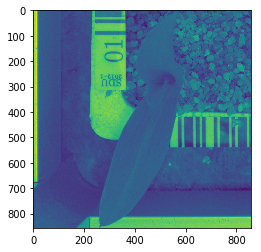

In [145]:
#visualize certain image to check manually
plt.imshow(image_per_class['Maize'][0])


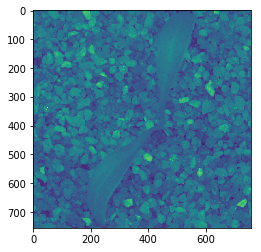

In [146]:
plt.imshow(image_per_class['Sugar beet'][0])

In [233]:
#store all data in the train set as a list
train=[]
for keys in image_per_class.keys():
    for idx in range(len(image_per_class[keys])):
        train.append([image_per_class[keys][idx],keys])


In [171]:
#def a function to change the categorical result of train set into array values, according to 
#the following rules

def type_to_label(label):
    if label == 'Black-grass':
        return [1,0,0,0,0,0,0,0,0,0,0,0]
    elif label == 'Charlock':
        return [0,1,0,0,0,0,0,0,0,0,0,0]
    elif label == 'Cleavers':
        return [0,0,1,0,0,0,0,0,0,0,0,0]
    elif label == 'Common Chickweed':
        return [0,0,0,1,0,0,0,0,0,0,0,0]
    elif label == 'Common wheat':
        return [0,0,0,0,1,0,0,0,0,0,0,0]
    elif label == 'Fat Hen':
        return [0,0,0,0,0,1,0,0,0,0,0,0]
    elif label == 'Loose Silky-bent':
        return [0,0,0,0,0,0,1,0,0,0,0,0]
    elif label == 'Maize':
        return [0,0,0,0,0,0,0,1,0,0,0,0]
    elif label == 'Scentless Mayweed':
        return [0,0,0,0,0,0,0,0,1,0,0,0]
    elif label == 'Shepherds Purse':
        return [0,0,0,0,0,0,0,0,0,1,0,0]
    elif label == 'Small-flowered Cranesbill':
        return [0,0,0,0,0,0,0,0,0,0,1,0]
    elif label == 'Sugar beet':
        return [0,0,0,0,0,0,0,0,0,0,0,1]

In [234]:
#resize the images in the train set to the scale(128,128)
#split the train data into a train set and a test set
import random

train_1=[]
for img in train:
    img_x = cv2.resize(img[0], (128, 128))
    img_x=img_x.astype(float)
    img_y = type_to_label(img[1])
    train_1.append([img_x,img_y])

train_size=int(0.8*len(train_1))
number=0
train_set=[]
for number in range(train_size):
    idx_num=random.randrange(len(train_1))
    chosen_data=train_set.append(train_1[idx_num])
    number+=1

test_size=int(0.2*len(train_1))
num=0
test_set=[]
for num in range(test_size):
    idx_num=random.randrange(len(train_1))
    chosen_data=test_set.append(train_1[idx_num])
    num+=1
    

In [173]:
#load test data,which is the data to submit to Kaggle.com
test_path = 'C:/jiaocai/Other/Plant Seedling Classification/test/'

test_data=[]

for image in os.listdir(test_path):
    image_path_1=test_path+'/'+str(image)
    image_col = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
    image_resized=cv2.resize(image_col, (128, 128))
    x_image=(np.array(image_resized)).astype(float)
    test_data.append([x_image,str(image)])

print(test_data[0])

[array([[114., 123., 123., ...,  96.,  83.,  96.],
       [119., 121., 122., ...,  62.,  80.,  78.],
       [129., 135., 140., ...,  68.,  65.,  71.],
       ...,
       [ 30.,  45.,  61., ...,  81.,  80.,  85.],
       [ 37.,  35.,  58., ...,  83.,  81.,  81.],
       [ 54.,  46.,  38., ...,  82.,  82.,  82.]]), '0021e90e4.png']


In [174]:
#use tensorflow backend for neural network models building
import tensorflow

import tflearn

from tflearn.layers.conv import conv_2d, max_pool_2d 

from tflearn.layers.core import input_data, dropout, fully_connected

from tflearn.layers.estimator import regression

In [175]:
tensorflow.reset_default_graph()

In [177]:
#get input and output from train_set
X = np.array([i[0] for i in train_set]).reshape(-1,128,128,1)
Y = [i[1] for i in train_set]

In [180]:
#get input and output from train_set
x_test = np.array([i[0] for i in test_set]).reshape(-1,128,128,1)
y_test = [i[1] for i in test_set]
print(x_test[0])
print(y_test[0])

[[[212.]
  [215.]
  [211.]
  ...
  [208.]
  [212.]
  [207.]]

 [[149.]
  [144.]
  [147.]
  ...
  [127.]
  [126.]
  [125.]]

 [[ 84.]
  [ 84.]
  [ 84.]
  ...
  [ 71.]
  [ 71.]
  [ 70.]]

 ...

 [[ 62.]
  [ 71.]
  [ 60.]
  ...
  [ 74.]
  [ 63.]
  [ 71.]]

 [[ 88.]
  [ 82.]
  [100.]
  ...
  [ 63.]
  [ 59.]
  [ 62.]]

 [[ 80.]
  [ 84.]
  [109.]
  ...
  [ 72.]
  [ 77.]
  [ 75.]]]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [176]:
#now apply the convolution neural network model to conduct the image classfication process
cnn=input_data(shape=[None,128, 128,1], name='InputData')

cnn = conv_2d(cnn, 64, 5, activation='softmax')
cnn = max_pool_2d(cnn, 5)

cnn = fully_connected(cnn,12,activation='softmax')

In [178]:
#define parameters of the convolution neural network

LR=0.001
cnn = regression(cnn, optimizer='adam', learning_rate=LR,loss='categorical_crossentropy',name='targets')

model = tflearn.DNN(cnn, tensorboard_dir='log')


0.001


In [181]:
#now run the model
model.fit({'InputData':X}, {'targets':Y},n_epoch=5, validation_set=({'InputData': x_test}, {'targets': y_test}), snapshot_step=100, show_metric=True)


Training Step: 299  | total loss: 0.90738 | time: 277.075s
| Adam | epoch: 005 | loss: 0.90738 - acc: 0.7483 -- iter: 3776/3800
Training Step: 300  | total loss: 0.90051 | time: 317.799s
| Adam | epoch: 005 | loss: 0.90051 - acc: 0.7548 | val_loss: 1.61812 - val_acc: 0.4937 -- iter: 3800/3800
--


In [182]:
model.save('Plant Seedling Classification')

INFO:tensorflow:C:\Users\xuxuejun\Plant Seedling Classification is not in all_model_checkpoint_paths. Manually adding it.


In [183]:
def label_return (model_out):
    if np.argmax(model_out) == 0: return  'Black-grass'
    elif np.argmax(model_out) == 1: return 'Charlock'
    elif np.argmax(model_out) == 2: return 'Cleavers'
    elif np.argmax(model_out) == 3: return 'Common Chickweed'
    elif np.argmax(model_out) == 4: return 'Common wheat'
    elif np.argmax(model_out) == 5: return 'Fat Hen'
    elif np.argmax(model_out) == 6: return 'Loose Silky-bent'
    elif np.argmax(model_out) == 7: return 'Maize'
    elif np.argmax(model_out) == 8: return 'Scentless Mayweed'
    elif np.argmax(model_out) == 9: return 'Shepherds Purse'
    elif np.argmax(model_out) == 10: return 'Small-flowered Cranesbill'
    elif np.argmax(model_out) == 11: return 'Sugar beet'

In [189]:
def num_to_array(pred_out):
    if np.argmax(pred_out)==0: return [1,0,0,0,0,0,0,0,0,0,0,0]
    elif np.argmax(pred_out)==1: return [0,1,0,0,0,0,0,0,0,0,0,0]
    elif np.argmax(pred_out)==2: return [0,0,1,0,0,0,0,0,0,0,0,0]
    elif np.argmax(pred_out)==3: return [0,0,0,1,0,0,0,0,0,0,0,0]
    elif np.argmax(pred_out)==4: return [0,0,0,0,1,0,0,0,0,0,0,0]
    elif np.argmax(pred_out)==5: return [0,0,0,0,0,1,0,0,0,0,0,0]
    elif np.argmax(pred_out)==6: return [0,0,0,0,0,0,1,0,0,0,0,0]
    elif np.argmax(pred_out)==7: return [0,0,0,0,0,0,0,1,0,0,0,0]
    elif np.argmax(pred_out)==8: return [0,0,0,0,0,0,0,0,1,0,0,0]
    elif np.argmax(pred_out)==9: return [0,0,0,0,0,0,0,0,0,1,0,0]
    elif np.argmax(pred_out)==10: return [0,0,0,0,0,0,0,0,0,0,1,0]
    elif np.argmax(pred_out)==11: return [0,0,0,0,0,0,0,0,0,0,0,1]


In [192]:
#write out a submission file and save the prediction results
#into pred_y list

openfile=open('my_submission.csv','wt')
openfile.write('file,species\n')

pred_y=[]
for image in test_set: 
    pred_img=np.array(image[0]).reshape(-1,128,128,1)
    pre_species=model.predict(pred_img)[0]
    file_name=image[1]
    species=label_return (pre_species)
    species_array=num_to_array(pre_species)
    pred_y.append(species_array)
    openfile.write(file_name+','+species+'\n')
openfile.close()

print(pred_y)


[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0

In [202]:
#the next step is to evaluate the model performance
#use precision rate to measure model performance

sum=0
for idx in range(len(y_test)):
    if np.argmax(y_test[idx])==np.argmax(pred_y[idx]):
        sum=sum+1
    else:
        sum=sum+0

total_precision=sum/len(y_test)
print(total_precision)

0.4936842105263158


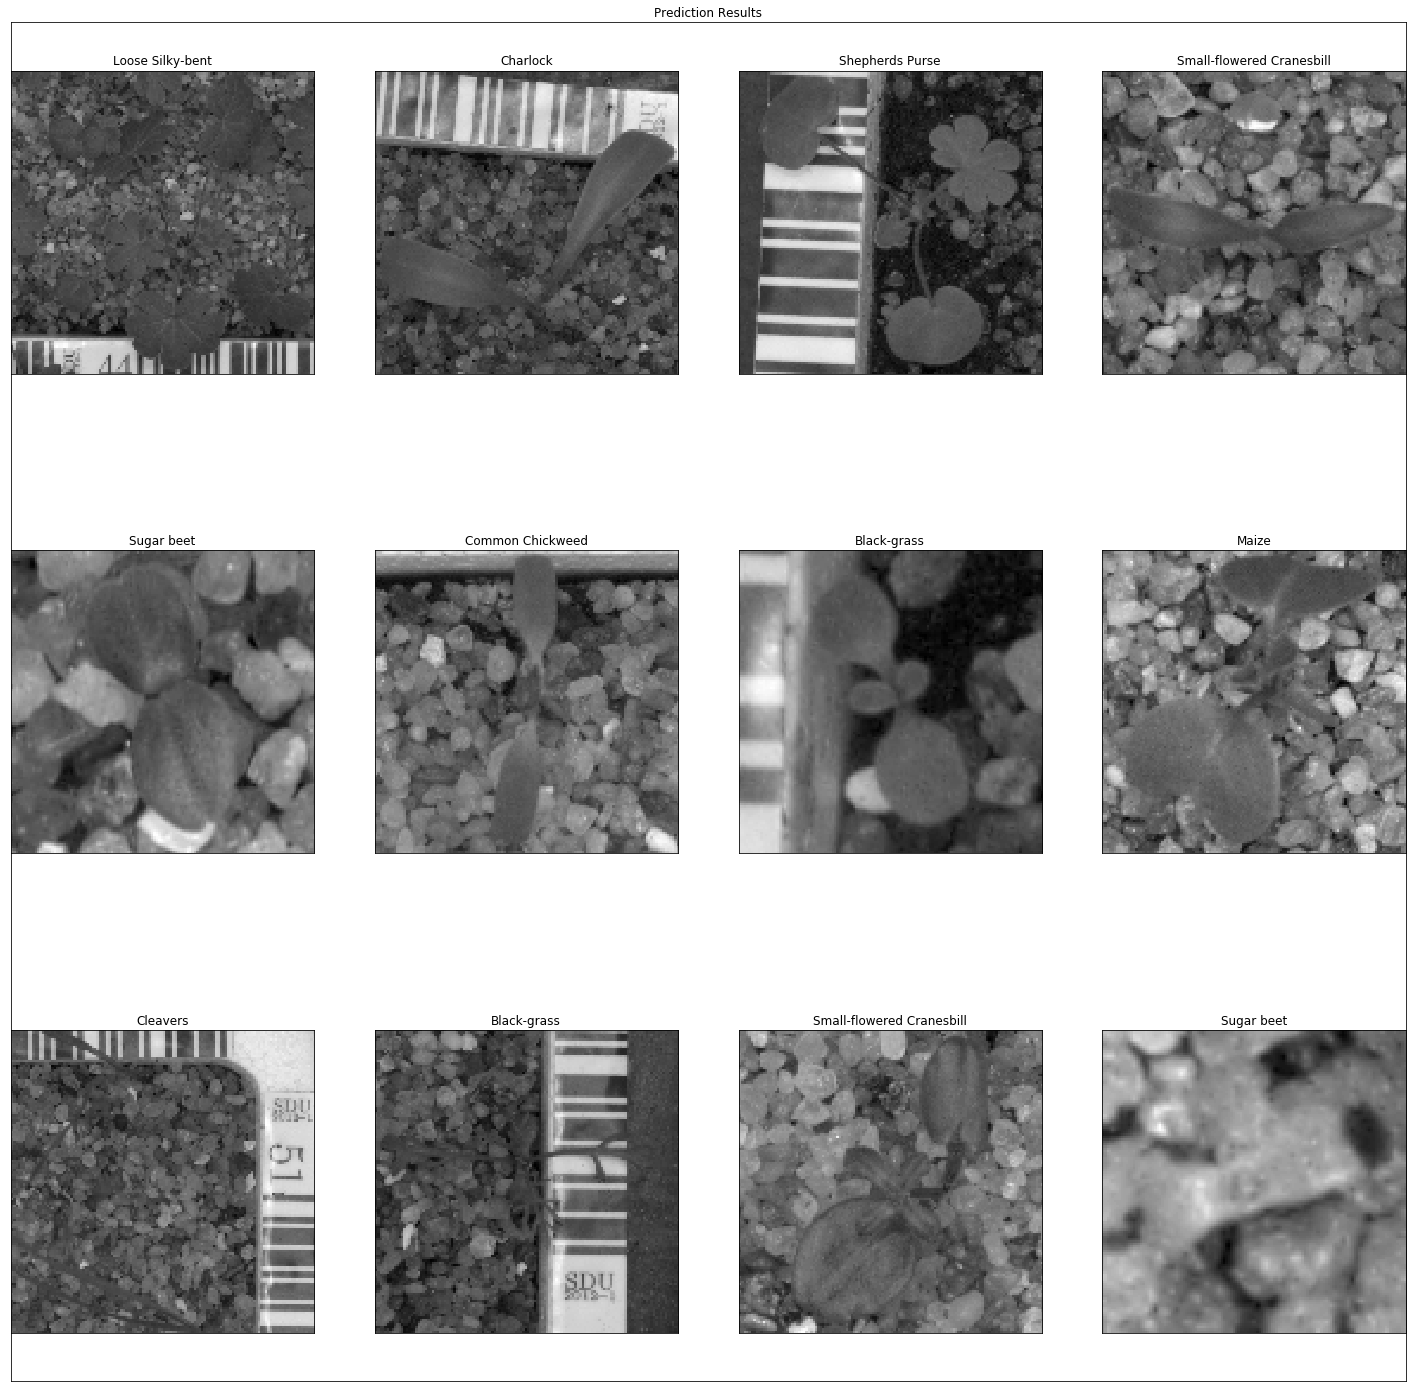

In [237]:
#Visualization of predicted result

fig=plt.figure(figsize = (25,25))
plots=plt.title('Prediction Results')
plots.axes.get_xaxis().set_visible(False)
plots.axes.get_yaxis().set_visible(False)

for num,data in enumerate(test_set[:12]): 
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(128,128,1)
    #model_out = model.predict([data])[0]
    str_label=label_return(y_test[num])
    y.imshow(orig,cmap='gray',interpolation='nearest')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

plt.show()
fig.savefig('Sample Prediction.png')